In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
from pandas import concat
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, Normalizer, normalize
import matplotlib.pyplot as plt
from pandas import DataFrame


from numpy import concatenate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
from keras.layers import Dense, Dropout, LSTM, BatchNormalization, TimeDistributed
from keras.layers import Conv3D, Conv2D, Conv1D, GlobalMaxPool1D, AveragePooling1D, MaxPooling1D

In [3]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib



matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [5]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam, Adamax

In [6]:
dataset = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/dataset.csv")

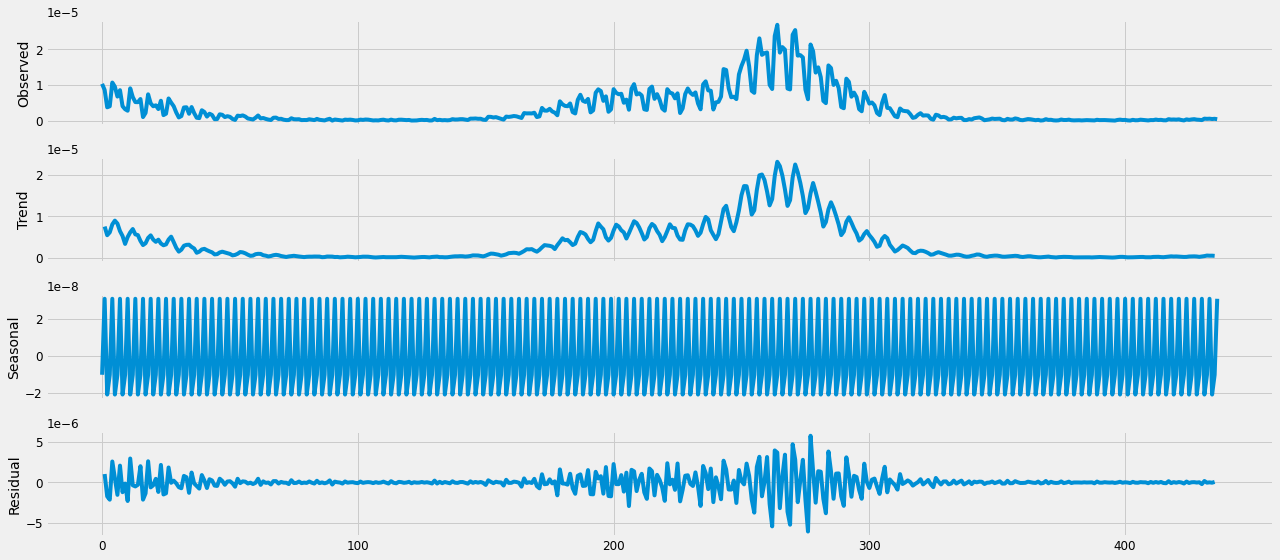

In [7]:
import statsmodels.api as sm

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(dataset["Mortality_Rate"], model = "additive", freq = 3)
fig = decomposition.plot()
plt.show()

In [8]:
dataset.head()

,date,new_cases,reproduction_rate,icu_patients,hosp_patients,new_tests,positive_rate,people_vaccinated,people_fully_vaccinated,new_vaccinations,Lockdown,Variant,Vaccine,GDP_PER_CAPITA,Population,Mortality_Rate
0,2020-05-01,4730.0,0.94,2178.0,14723.0,74142.0,0.088,0.0,0.0,0.0,0,0,0,39753.244,67886004.0,0.000010
1,2020-05-02,3230.0,0.91,2068.0,14380.0,63559.0,0.079,0.0,0.0,0.0,0,0,0,39753.244,67886004.0,0.000009
2,2020-05-03,2977.0,0.87,2009.0,14188.0,68203.0,0.071,0.0,0.0,0.0,0,0,0,39753.244,67886004.0,0.000004
3,2020-05-04,3383.0,0.82,1936.0,14097.0,72630.0,0.061,0.0,0.0,0.0,0,0,0,39753.244,67886004.0,0.000004
4,2020-05-05,3689.0,0.81,1874.0,13723.0,66919.0,0.057,0.0,0.0,0.0,0,0,0,39753.244,67886004.0,0.000011


In [9]:
features = ["date", "Mortality_Rate", "new_tests", "positive_rate", 
           "reproduction_rate", "hosp_patients"]

In [10]:
dataset = dataset[features]

In [11]:
dataset.info()
dataset.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               437 non-null    object 
 1   Mortality_Rate     437 non-null    float64
 2   new_tests          437 non-null    float64
 3   positive_rate      437 non-null    float64
 4   reproduction_rate  437 non-null    float64
 5   hosp_patients      437 non-null    float64
dtypes: float64(5), object(1)
memory usage: 20.6+ KB


,date,Mortality_Rate,new_tests,positive_rate,reproduction_rate,hosp_patients
127,2020-09-05,1.767669e-07,189054.0,0.009,1.44,812.0
423,2021-06-28,4.419173e-08,1095973.0,0.016,1.55,1732.0
189,2020-11-06,5.229355e-06,355032.0,0.076,1.04,13958.0
132,2020-09-10,2.062281e-07,233125.0,0.012,1.42,944.0
32,2020-06-02,3.682644e-06,92299.0,0.016,0.74,7087.0


In [12]:
train = dataset[ : 400]
test = dataset[40 : ]

In [13]:
X_train = train.iloc[ : ,  : -1]
Y_train = train.iloc[ : , -1 : ]
X_test = test.iloc[ : ,  : -1]
Y_test = test.iloc[ : , -1 : ]

In [14]:
values = dataset.values

In [15]:
dataset.describe()

,Mortality_Rate,new_tests,positive_rate,reproduction_rate,hosp_patients
count,4.370000e+02,4.370000e+02,437.000000,437.000000,437.000000
mean,3.436135e-06,4.827598e+05,0.028112,1.040892,9109.594966
std,5.017188e-06,3.856150e+05,0.029923,0.253412,10090.602677
min,0.000000e+00,5.946400e+04,0.002000,0.500000,770.000000
25%,2.356892e-07,1.732130e+05,0.005000,0.820000,1401.000000
50%,9.574875e-07,3.560260e+05,0.013000,1.030000,4358.000000
75%,5.111510e-06,6.954770e+05,0.049000,1.250000,14723.000000
max,2.689803e-05,1.893830e+06,0.128000,1.960000,39254.000000


In [16]:
dataset.info()
dataset.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               437 non-null    object 
 1   Mortality_Rate     437 non-null    float64
 2   new_tests          437 non-null    float64
 3   positive_rate      437 non-null    float64
 4   reproduction_rate  437 non-null    float64
 5   hosp_patients      437 non-null    float64
dtypes: float64(5), object(1)
memory usage: 20.6+ KB


,date,Mortality_Rate,new_tests,positive_rate,reproduction_rate,hosp_patients
314,2021-03-11,2.666234e-06,1614145.0,0.005,0.87,8066.0
336,2021-04-02,7.659900e-07,555613.0,0.004,0.74,3375.0
7,2020-05-08,8.543735e-06,76963.0,0.047,0.81,12053.0
312,2021-03-09,3.402763e-06,1374579.0,0.006,0.82,9009.0
33,2020-06-03,3.741567e-06,101885.0,0.015,0.73,6815.0


In [17]:
dataset.set_index("date", inplace = True)

In [18]:
values = dataset.values

In [19]:
dataset.head()

,Mortality_Rate,new_tests,positive_rate,reproduction_rate,hosp_patients
date,,,,,
2020-05-01,0.000010,74142.0,0.088,0.94,14723.0
2020-05-02,0.000009,63559.0,0.079,0.91,14380.0
2020-05-03,0.000004,68203.0,0.071,0.87,14188.0
2020-05-04,0.000004,72630.0,0.061,0.82,14097.0
2020-05-05,0.000011,66919.0,0.057,0.81,13723.0


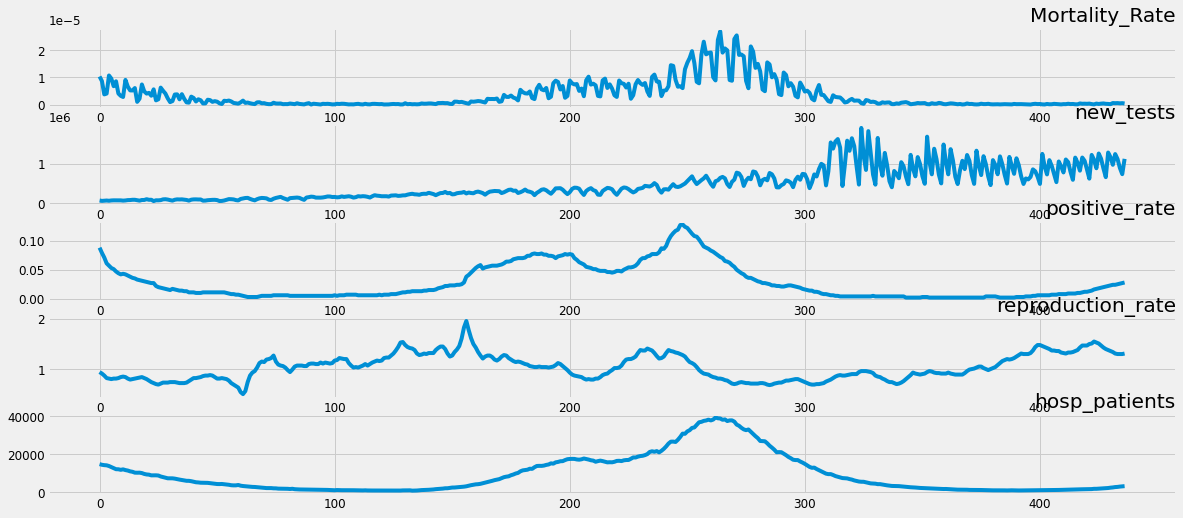

In [20]:
groups = [0,1,2,3,4]
i = 1

plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[ : , group])
	plt.title(dataset.columns[group], y = 1, loc = 'right')
	i += 1
plt.show()

In [21]:
dataset.head()

,Mortality_Rate,new_tests,positive_rate,reproduction_rate,hosp_patients
date,,,,,
2020-05-01,0.000010,74142.0,0.088,0.94,14723.0
2020-05-02,0.000009,63559.0,0.079,0.91,14380.0
2020-05-03,0.000004,68203.0,0.071,0.87,14188.0
2020-05-04,0.000004,72630.0,0.061,0.82,14097.0
2020-05-05,0.000011,66919.0,0.057,0.81,13723.0


In [22]:
values = dataset.values

In [23]:
values[0]

array([1.03114038e-05, 7.41420000e+04, 8.80000000e-02, 9.40000000e-01,
       1.47230000e+04])

In [24]:
values = values.astype("float32")

In [25]:
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

In [26]:
#the source of code --> https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	agg = concat(cols, axis=1)
	agg.columns = names
	if dropnan:
		agg.dropna(inplace = True)
	return agg


reframed = series_to_supervised(scaled, 1, 1)

In [27]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...   var3(t)   var4(t)   var5(t)
1   1.371914  -1.060867   2.003685  ...  1.702569 -0.517112  0.522907
2   1.033884  -1.088343   1.702569  ...  1.434911 -0.675138  0.503857
3   0.058008  -1.076286   1.434911  ...  1.100339 -0.872671  0.494829
4   0.116795  -1.064792   1.100339  ...  0.966509 -0.912178  0.457722
5   1.445398  -1.079619   0.966509  ...  0.832680 -0.951685  0.400673

[5 rows x 10 columns]


In [28]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)'],
      dtype='object')

In [29]:
features = ["var2(t-1)", "var3(t-1)", "var4(t-1)", "var5(t-1)", "var1(t)"]

In [30]:
 dataset.head()

,Mortality_Rate,new_tests,positive_rate,reproduction_rate,hosp_patients
date,,,,,
2020-05-01,0.000010,74142.0,0.088,0.94,14723.0
2020-05-02,0.000009,63559.0,0.079,0.91,14380.0
2020-05-03,0.000004,68203.0,0.071,0.87,14188.0
2020-05-04,0.000004,72630.0,0.061,0.82,14097.0
2020-05-05,0.000011,66919.0,0.057,0.81,13723.0


In [31]:
reframed = reframed[features]

In [32]:
reframed.head()

,var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
1,-1.060867,2.003685,-0.398592,0.556938,1.033884
2,-1.088343,1.702569,-0.517112,0.522907,0.058008
3,-1.076286,1.434911,-0.675138,0.503857,0.116795
4,-1.064792,1.100339,-0.872671,0.494829,1.445398
5,-1.079619,0.966509,-0.912178,0.457722,1.216126


In [33]:
reframed = reframed.rename(columns = {'var2(t-1)': 'new_tests', 'var3(t-1)' : 'positive_rate', 'var4(t-1)' : 'reproduction_rate', 'var5(t-1)' : 'hosp_patients', 'var1(t)' : 'Mortality_Rate'})

In [34]:
reframed.head()

,new_tests,positive_rate,reproduction_rate,hosp_patients,Mortality_Rate
1,-1.060867,2.003685,-0.398592,0.556938,1.033884
2,-1.088343,1.702569,-0.517112,0.522907,0.058008
3,-1.076286,1.434911,-0.675138,0.503857,0.116795
4,-1.064792,1.100339,-0.872671,0.494829,1.445398
5,-1.079619,0.966509,-0.912178,0.457722,1.216126


In [35]:
reframed.tail(10)

,new_tests,positive_rate,reproduction_rate,hosp_patients,Mortality_Rate
427,1.658780,-0.304867,1.695259,-0.713618,-0.606294
428,1.022620,-0.271410,1.537232,-0.705979,-0.632749
429,0.458438,-0.237952,1.418712,-0.701712,-0.641567
430,2.060975,-0.204495,1.339699,-0.690005,-0.659203
431,1.760189,-0.171038,1.260686,-0.671948,-0.576900
432,1.261323,-0.137581,1.181673,-0.659943,-0.588658
433,1.960758,-0.137581,1.063153,-0.640794,-0.579840
434,1.639454,-0.104123,1.023646,-0.632361,-0.597476
435,1.055971,-0.070666,1.023646,-0.615395,-0.585718
436,0.651896,-0.037209,1.023646,-0.606267,-0.609233


In [36]:
values = reframed.values

In [37]:
train = values[ : 400, : ]
test = values[400 : , : ]

In [38]:
test[0]

array([ 0.0157907, -0.7398115,  1.7347654, -0.8110481, -0.6739   ],
      dtype=float32)

In [39]:
dataset[400 : 403]

,Mortality_Rate,new_tests,positive_rate,reproduction_rate,hosp_patients
date,,,,,
2021-06-05,1.914975e-07,488842.0,0.006,1.48,935.0
2021-06-06,5.892231e-08,1242068.0,0.006,1.46,961.0
2021-06-07,1.473058e-08,928425.0,0.006,1.44,1032.0


In [40]:
X_train, Y_train = train[ : , : -1], train[ : , -1]
X_test, Y_test = test[ : , : -1], test[ : , -1]

In [41]:
train[0]

array([-1.0608668 ,  2.0036848 , -0.39859194,  0.55693793,  1.0338842 ],
      dtype=float32)

In [42]:
test[0]

array([ 0.0157907, -0.7398115,  1.7347654, -0.8110481, -0.6739   ],
      dtype=float32)

In [43]:
X_test[0]

array([ 0.0157907, -0.7398115,  1.7347654, -0.8110481], dtype=float32)

In [44]:
Y_test[0]

-0.6739

In [45]:
test[0]

array([ 0.0157907, -0.7398115,  1.7347654, -0.8110481, -0.6739   ],
      dtype=float32)

In [46]:
X_train = X_train.reshape((X_train.shape[0], 1 , X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1 , X_test.shape[1]))

In [47]:
Y_test

array([-0.6739    , -0.68271816, -0.6445061 , -0.6680212 , -0.6650818 ,
       -0.63568795, -0.6503849 , -0.66214246, -0.67683935, -0.65626365,
       -0.65920305, -0.6298092 , -0.65332425, -0.6445061 , -0.6680212 ,
       -0.6709606 , -0.6062941 , -0.6298092 , -0.62393045, -0.6327486 ,
       -0.61805165, -0.65332425, -0.67683935, -0.61805165, -0.6445061 ,
       -0.62099105, -0.6062941 , -0.6327486 , -0.64156675, -0.65920305,
       -0.5769002 , -0.58865774, -0.5798396 , -0.59747595, -0.5857184 ,
       -0.6092335 ], dtype=float32)

In [48]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(400, 1, 4) (400,) (36, 1, 4) (36,)


In [49]:
model = Sequential()
model.add(LSTM(50, input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences = True))
model.add(Dropout(0.2))
#model.add(TimeDistributed(Dense(10, activation = "relu")))
model.add(Conv1D(16, activation = "relu", kernel_size = 1))
#model.add(TimeDistributed(Dense(10, activation = "relu")))
model.add(LSTM(5, input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences = True))
model.add(Conv1D(32, kernel_size = 1, activation = "linear"))
model.add(GlobalMaxPool1D())
model.add(Flatten())
#model.add(LSTM(50, input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences = True))
#model.add(TimeDistributed(Dense(1, activation = "relu")))
#model.add(Dense(10))
model.add(Dense(1))

opt = RMSprop(learning_rate = 0.01)
 
model.compile(optimizer = opt, loss = "mse")

In [50]:
history = model.fit(X_train, Y_train, epochs = 14, batch_size = 72, validation_split = 0.2, verbose = 2, shuffle = True)

Epoch 1/14
5/5 - 5s - loss: 1.0135 - val_loss: 0.6325
Epoch 2/14
5/5 - 0s - loss: 0.4330 - val_loss: 0.2472
Epoch 3/14
5/5 - 0s - loss: 0.3626 - val_loss: 0.0623
Epoch 4/14
5/5 - 0s - loss: 0.2781 - val_loss: 0.0912
Epoch 5/14
5/5 - 0s - loss: 0.3060 - val_loss: 0.0829
Epoch 6/14
5/5 - 0s - loss: 0.2854 - val_loss: 0.0138
Epoch 7/14
5/5 - 0s - loss: 0.2926 - val_loss: 0.0230
Epoch 8/14
5/5 - 0s - loss: 0.2756 - val_loss: 0.0116
Epoch 9/14
5/5 - 0s - loss: 0.2370 - val_loss: 0.0126
Epoch 10/14
5/5 - 0s - loss: 0.2615 - val_loss: 0.0062
Epoch 11/14
5/5 - 0s - loss: 0.2595 - val_loss: 0.0127
Epoch 12/14
5/5 - 0s - loss: 0.2247 - val_loss: 0.0222
Epoch 13/14
5/5 - 0s - loss: 0.2537 - val_loss: 0.0233
Epoch 14/14
5/5 - 0s - loss: 0.2768 - val_loss: 0.0093


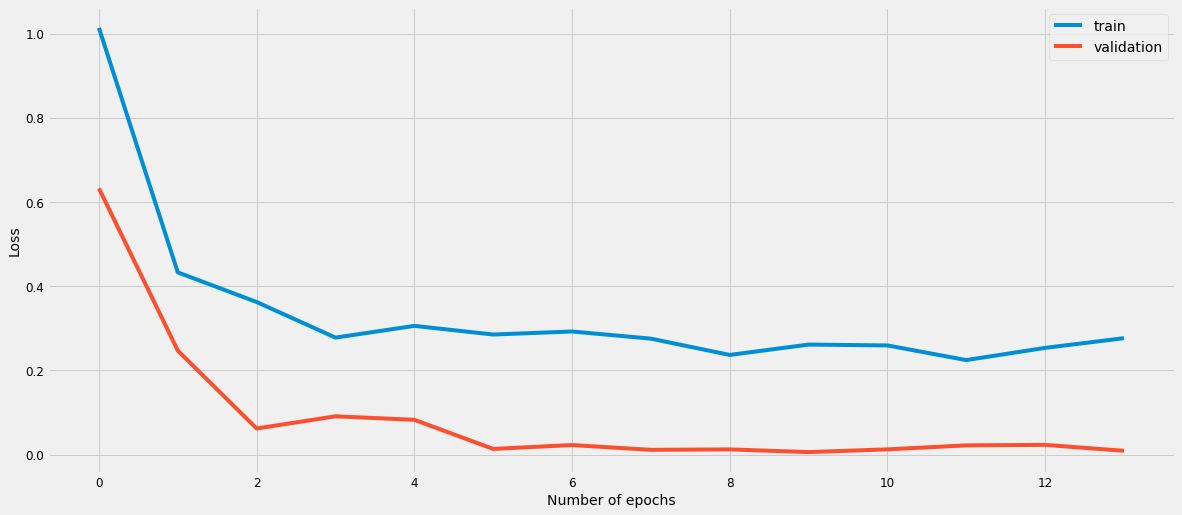

In [51]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'validation')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [52]:
prediction = model.predict(X_test)

In [53]:
Y_test.ndim

1

In [54]:
prediction.ndim

2

In [55]:
Y_test.shape

(36,)

In [56]:
prediction.shape

(36, 1)

In [57]:
prediction.shape

(36, 1)

In [58]:
prediction = prediction.reshape(36,1)

In [59]:
mse = mean_squared_error(Y_test, prediction)
mae = mean_absolute_error(Y_test, prediction)
rmse = sqrt(mean_squared_error(Y_test, prediction))
print('The Mean squared error (MSE) is : %.4f' % (mse))
print('The Mean absolute error (MAE) is : %.4f' % (mae))
print('The Root mean absolute error (RMSE) is : %.4f' % (rmse))

The Mean squared error (MSE) is : 0.0019
The Mean absolute error (MAE) is : 0.0329
The Root mean absolute error (RMSE) is : 0.0431


In [60]:
Y_test

array([-0.6739    , -0.68271816, -0.6445061 , -0.6680212 , -0.6650818 ,
       -0.63568795, -0.6503849 , -0.66214246, -0.67683935, -0.65626365,
       -0.65920305, -0.6298092 , -0.65332425, -0.6445061 , -0.6680212 ,
       -0.6709606 , -0.6062941 , -0.6298092 , -0.62393045, -0.6327486 ,
       -0.61805165, -0.65332425, -0.67683935, -0.61805165, -0.6445061 ,
       -0.62099105, -0.6062941 , -0.6327486 , -0.64156675, -0.65920305,
       -0.5769002 , -0.58865774, -0.5798396 , -0.59747595, -0.5857184 ,
       -0.6092335 ], dtype=float32)

In [61]:
prediction

array([[-0.6806442 ],
       [-0.6271498 ],
       [-0.6587166 ],
       [-0.67331856],
       [-0.63613075],
       [-0.64867   ],
       [-0.6674565 ],
       [-0.6732753 ],
       [-0.6293743 ],
       [-0.6423686 ],
       [-0.6558553 ],
       [-0.6142824 ],
       [-0.6219514 ],
       [-0.6502517 ],
       [-0.6624808 ],
       [-0.6047861 ],
       [-0.6213966 ],
       [-0.6485711 ],
       [-0.6080827 ],
       [-0.61366516],
       [-0.6418724 ],
       [-0.6553106 ],
       [-0.6006575 ],
       [-0.5984989 ],
       [-0.6223082 ],
       [-0.58210033],
       [-0.5750786 ],
       [-0.60011274],
       [-0.6152287 ],
       [-0.53408223],
       [-0.533384  ],
       [-0.5446119 ],
       [-0.5004249 ],
       [-0.505006  ],
       [-0.5304529 ],
       [-0.548102  ]], dtype=float32)

In [64]:
r2_score(Y_test, prediction) 

0.11716987297730129